In [1]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [2]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
oecd_bli = pd.read_csv('/Users/jungjihoon/00_DataScience/민형기/oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv('/Users/jungjihoon/00_DataScience/민형기/gdp_per_capita.csv', thousands=',', delimiter='\t', na_values='n/a')

In [ ]:
oecd_bli

In [ ]:
oecd_bli = oecd_bli[oecd_bli['INEQUALITY']=='TOT']
oecd_bli.head()

In [ ]:
oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value' )
oecd_bli.head()

In [ ]:
gdp_per_capita.rename(columns={'2015':"GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                             left_index=True, right_index=True)
full_country_stats.head()

In [ ]:
full_country_stats.sort_values(by='GDP per capita', inplace=True)
full_country_stats.head()

In [ ]:
##이상치 데이터 삭제

remove_indices = [0,1,6,8,33,34,35]
keep_indices = list(set(range(36)) - set(remove_indices))
full_country_stats[["GDP per capita",
                   'Life satisfaction']].iloc[keep_indices]

full_country_stats.head()

In [4]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli['INEQUALITY']=='TOT']
    oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value' )
    
    gdp_per_capita.rename(columns={'2015':"GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                 left_index=True, right_index=True)
    
    full_country_stats.sort_values(by='GDP per capita', inplace=True)
    remove_indices = [0,1,6,8,33,34,35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita",
                       'Life satisfaction']].iloc[keep_indices]
    

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


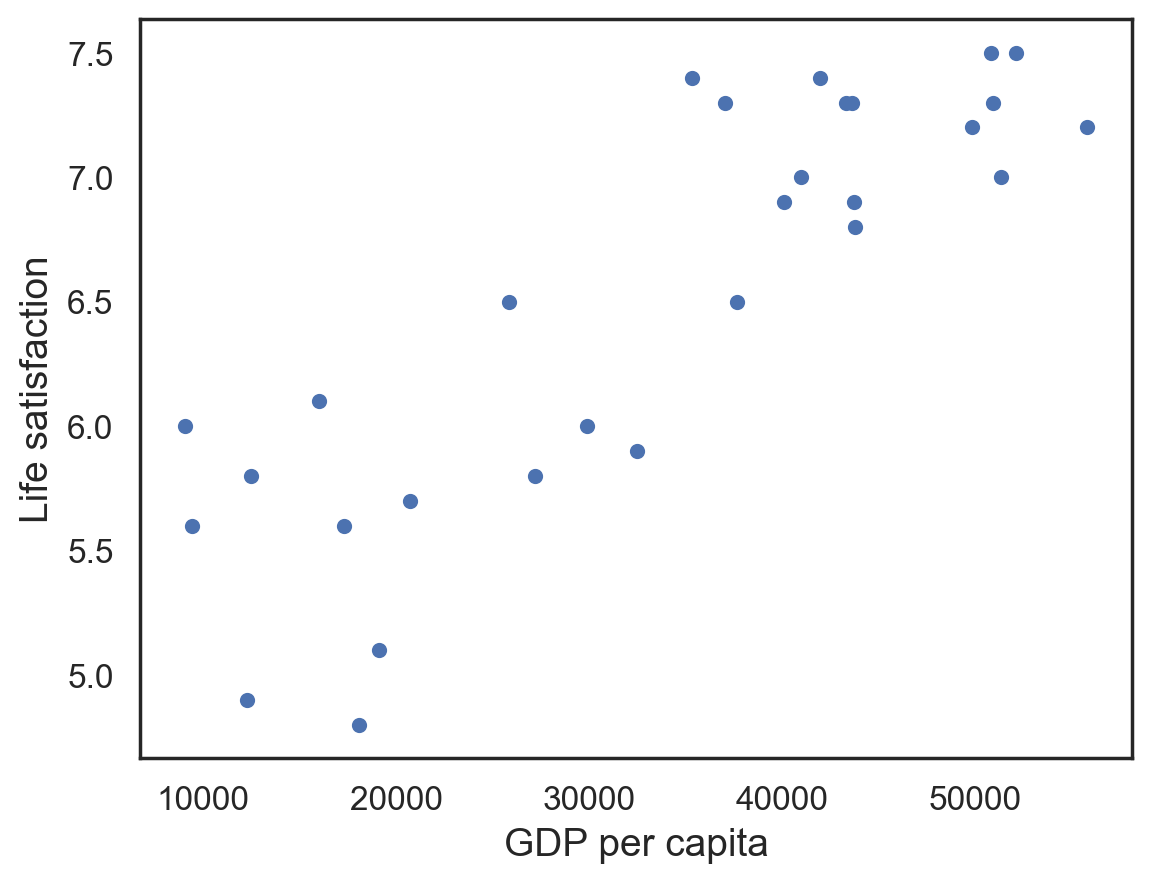

In [5]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

In [6]:
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

X_new = [[22587]] # 키프로스 1인당 
print(model.predict(X_new))

[[5.96242338]]
